# Core and Satellite

https://www.investopedia.com/articles/financial-theory/08/core-satellite-investing.asp

Portfolio Construction  
Managed passively  
Actively managed  
High-yield bond  

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

import warnings
warnings.filterwarnings("ignore")

# yfinance is used to fetch data 
import yfinance as yf
yf.pdr_override()

S&P 500 Index Fund  
Actively Managed High-Yield Bond Fund  
Actively Managed Biotechnology Fund  
Actively Managed Commodities Fund  

In [2]:
# input
symbols = ['SPY','FIHBX','FBTAX','DBC']
start = '2014-01-01'
end = '2019-01-01'

# Read data 
dataset = yf.download(symbols,start,end)['Adj Close']

# View Columns
dataset.head()

[*********************100%***********************]  4 of 4 completed


,DBC,FBTAX,FIHBX,SPY
Date,,,,
2014-01-02,24.572100,16.094238,6.937886,160.925400
2014-01-03,24.416641,16.017763,6.944685,160.898972
2014-01-06,24.445789,15.813823,6.944685,160.432693
2014-01-07,24.426357,16.068747,6.958275,161.418060
2014-01-08,24.193171,16.374655,6.958275,161.453278


In [3]:
dataset.tail()

,DBC,FBTAX,FIHBX,SPY
Date,,,,
2018-12-24,14.163118,20.312393,8.307596,227.638824
2018-12-26,14.478073,21.567284,8.289378,239.140244
2018-12-27,14.340280,21.632837,8.298485,240.976212
2018-12-28,14.222172,21.632837,8.334924,240.665375
2018-12-31,14.261541,22.101082,8.388957,242.773315


In [4]:
from datetime import datetime


def calculate_years(start, end): 
    date_format = "%Y-%m-%d"
    a = datetime.strptime(start, date_format).year
    b = datetime.strptime(end, date_format).year
    years = b - a
  
    return years 

In [5]:
print(calculate_years(start, end), 'years')

5 years


In [6]:
# Calculate Daily Returns
returns = dataset.pct_change()
returns = returns.dropna()

In [7]:
# Calculate mean returns
meanDailyReturns = returns.mean()
print(meanDailyReturns)

DBC     -0.000388
FBTAX    0.000403
FIHBX    0.000155
SPY      0.000362
dtype: float64


In [8]:
# Calculate std returns
stdDailyReturns = returns.std()
print(stdDailyReturns)

DBC      0.009496
FBTAX    0.017337
FIHBX    0.002734
SPY      0.008306
dtype: float64


In [9]:
# Define weights for the portfolio
weights = np.array([0.50, 0.10, 0.20, 0.20])

In [10]:
# Calculate the covariance matrix on daily returns
cov_matrix = (returns.cov())*250
print (cov_matrix)

            DBC     FBTAX     FIHBX       SPY
DBC    0.022544  0.005441  0.001920  0.006348
FBTAX  0.005441  0.075140  0.003101  0.023501
FIHBX  0.001920  0.003101  0.001869  0.002384
SPY    0.006348  0.023501  0.002384  0.017247


In [11]:
# Calculate expected portfolio performance
portReturn = np.sum(meanDailyReturns*weights)

In [12]:
# Print the portfolio return
print(portReturn)

-5.022474207717689e-05


In [13]:
# Create portfolio returns column
returns['Portfolio'] = returns.dot(weights)

In [14]:
returns.head()

,DBC,FBTAX,FIHBX,SPY,Portfolio
Date,,,,,
2014-01-03,-0.006327,-0.004752,0.000980,-0.000164,-0.003475
2014-01-06,0.001194,-0.012732,0.000000,-0.002898,-0.001256
2014-01-07,-0.000795,0.016120,0.001957,0.006142,0.002834
2014-01-08,-0.009547,0.019037,0.000000,0.000218,-0.002826
2014-01-09,-0.008032,0.047743,0.000000,0.000654,0.000889


In [15]:
returns.tail()

,DBC,FBTAX,FIHBX,SPY,Portfolio
Date,,,,,
2018-12-24,-0.011065,-0.010944,-0.003279,-0.026423,-0.012567
2018-12-26,0.022238,0.061780,-0.002193,0.050525,0.026963
2018-12-27,-0.009517,0.003039,0.001099,0.007677,-0.002700
2018-12-28,-0.008236,0.000000,0.004391,-0.001290,-0.003498
2018-12-31,0.002768,0.021645,0.006483,0.008759,0.006597


In [16]:
# Calculate cumulative returns
daily_cum_ret=(1+returns).cumprod()
print(daily_cum_ret.tail())

                 DBC     FBTAX     FIHBX       SPY  Portfolio
Date                                                         
2018-12-24  0.576390  1.262091  1.197425  1.414561   0.889783
2018-12-26  0.589208  1.340062  1.194799  1.486032   0.913774
2018-12-27  0.583600  1.344136  1.196111  1.497441   0.911307
2018-12-28  0.578794  1.344136  1.201364  1.495509   0.908120
2018-12-31  0.580396  1.373229  1.209152  1.508608   0.914110


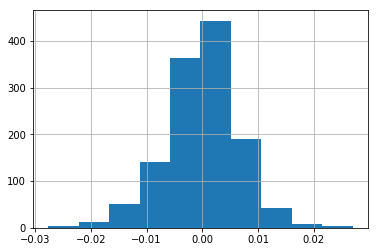

In [17]:
returns['Portfolio'].hist()
plt.show()

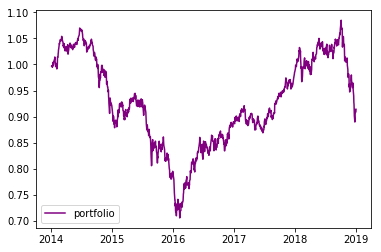

In [18]:
import matplotlib.dates

# Plot the portfolio cumulative returns only
fig, ax = plt.subplots()
ax.plot(daily_cum_ret.index, daily_cum_ret.Portfolio, color='purple', label="portfolio")
ax.xaxis.set_major_locator(matplotlib.dates.YearLocator())
plt.legend()
plt.show()

In [19]:
# Print the mean
print("mean : ", returns['Portfolio'].mean()*100)

# Print the standard deviation
print("Std. dev: ", returns['Portfolio'].std()*100)

# Print the skewness
print("skew: ", returns['Portfolio'].skew())

# Print the kurtosis
print("kurt: ", returns['Portfolio'].kurtosis())

mean :  -0.005022474207717679
Std. dev:  0.6512920236657875
skew:  -0.22605463679872187
kurt:  1.299622507098448


In [20]:
# Calculate the standard deviation by taking the square root
port_standard_dev = np.sqrt(np.dot(weights.T, np.dot(weights, cov_matrix)))

# Print the results 
print(str(np.round(port_standard_dev, 4) * 100) + '%')

10.299999999999999%


In [21]:
# Calculate the portfolio variance
port_variance = np.dot(weights.T, np.dot(cov_matrix, weights))

# Print the result
print(str(np.round(port_variance, 4) * 100) + '%')

1.06%


In [22]:
# Calculate total return and annualized return from price data 
total_return = (returns['Portfolio'][-1] - returns['Portfolio'][0]) / returns['Portfolio'][0]

# Annualize the total return over 5 year 
annualized_return = ((1+total_return)**(1/5))-1

In [23]:
# Calculate annualized volatility from the standard deviation
vol_port = returns['Portfolio'].std() * np.sqrt(250)

In [24]:
# Calculate the Sharpe ratio 
rf = 0.01
sharpe_ratio = ((annualized_return - rf) / vol_port)
print(sharpe_ratio)

nan


In [25]:
# Create a downside return column with the negative returns only
target = 0
downside_returns = returns.loc[returns['Portfolio'] < target]

# Calculate expected return and std dev of downside
expected_return = returns['Portfolio'].mean()
down_stdev = downside_returns.std()

# Calculate the sortino ratio
rf = 0.01
sortino_ratio = (expected_return - rf)/down_stdev

# Print the results
print("Expected return: ", expected_return*100)
print('-' * 50)
print("Downside risk:")
print(down_stdev*100)
print('-' * 50)
print("Sortino ratio:")
print(sortino_ratio)

Expected return:  -0.005022474207717679
--------------------------------------------------
Downside risk:
DBC          0.717214
FBTAX        1.608918
FIHBX        0.269959
SPY          0.779532
Portfolio    0.459835
dtype: float64
--------------------------------------------------
Sortino ratio:
DBC         -1.401287
FBTAX       -0.624657
FIHBX       -3.722868
SPY         -1.289263
Portfolio   -2.185616
dtype: float64


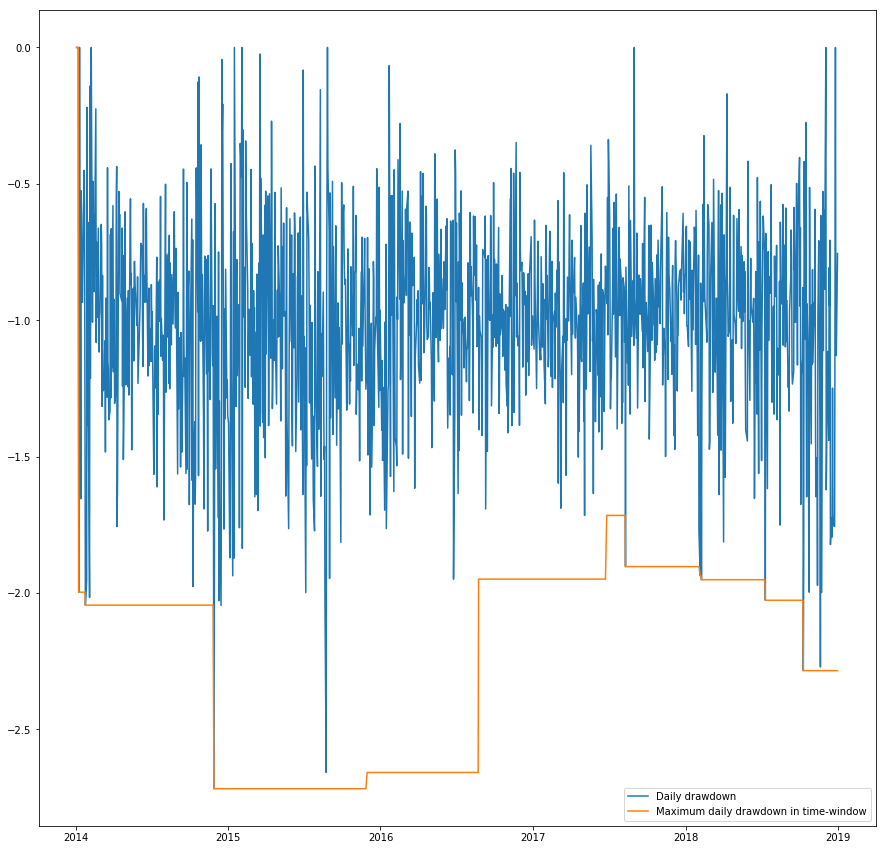

In [26]:
# Calculate the max value 
roll_max = returns['Portfolio'].rolling(center=False,min_periods=1,window=252).max()

# Calculate the daily draw-down relative to the max
daily_draw_down = returns['Portfolio']/roll_max - 1.0

# Calculate the minimum (negative) daily draw-down
max_daily_draw_down = daily_draw_down.rolling(center=False,min_periods=1,window=252).min()

# Plot the results
plt.figure(figsize=(15,15))
plt.plot(returns.index, daily_draw_down, label='Daily drawdown')
plt.plot(returns.index, max_daily_draw_down, label='Maximum daily drawdown in time-window')
plt.legend()
plt.show()

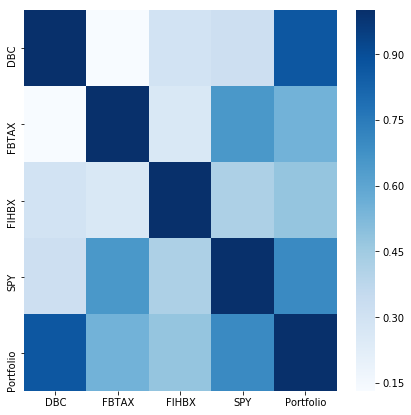

In [27]:
plt.figure(figsize=(7,7))
corr = returns.corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
            cmap="Blues")

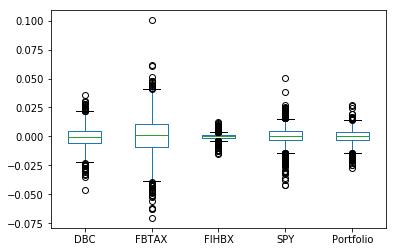

In [28]:
# Box plot
returns.plot(kind='box')

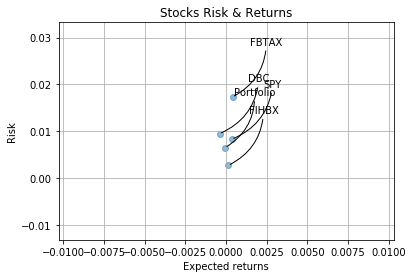

In [29]:
rets = returns.dropna()

plt.scatter(rets.mean(), rets.std(),alpha = 0.5)

plt.title('Stocks Risk & Returns')
plt.xlabel('Expected returns')
plt.ylabel('Risk')
plt.grid(which='major')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.3'))

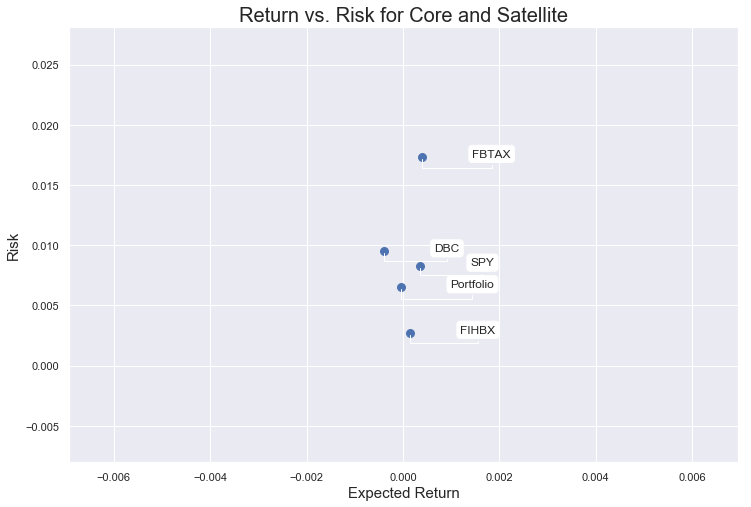

In [30]:
area = np.pi*20.0

sns.set(style='darkgrid')
plt.figure(figsize=(12,8))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel("Expected Return", fontsize=15)
plt.ylabel("Risk", fontsize=15)
plt.title("Return vs. Risk for Core and Satellite", fontsize=20)

for label, x, y in zip(rets.columns, rets.mean(), rets.std()) : 
    plt.annotate(label, xy=(x,y), xytext=(50, 0), textcoords='offset points',
                arrowprops=dict(arrowstyle='-', connectionstyle='bar,angle=180,fraction=-0.2'),
                bbox=dict(boxstyle="round", fc="w"))

In [31]:
print("Stock returns: ")
print(rets.mean())
print('-' * 50)
print("Stock risk:")
print(rets.std())

Stock returns: 
DBC         -0.000388
FBTAX        0.000403
FIHBX        0.000155
SPY          0.000362
Portfolio   -0.000050
dtype: float64
--------------------------------------------------
Stock risk:
DBC          0.009496
FBTAX        0.017337
FIHBX        0.002734
SPY          0.008306
Portfolio    0.006513
dtype: float64


In [32]:
table = pd.DataFrame()
table['Returns'] = rets.mean()
table['Risk'] = rets.std()
table.sort_values(by='Returns')

,Returns,Risk
DBC,-0.000388,0.009496
Portfolio,-0.000050,0.006513
FIHBX,0.000155,0.002734
SPY,0.000362,0.008306
FBTAX,0.000403,0.017337


In [33]:
table.sort_values(by='Risk')

,Returns,Risk
FIHBX,0.000155,0.002734
Portfolio,-0.000050,0.006513
SPY,0.000362,0.008306
DBC,-0.000388,0.009496
FBTAX,0.000403,0.017337


In [34]:
rf = 0.01
table['Sharpe_Ratio'] = (table['Returns'] - rf) / table['Risk']
table

,Returns,Risk,Sharpe_Ratio
DBC,-0.000388,0.009496,-1.093885
FBTAX,0.000403,0.017337,-0.553582
FIHBX,0.000155,0.002734,-3.601052
SPY,0.000362,0.008306,-1.160409
Portfolio,-0.000050,0.006513,-1.543121


In [35]:
days_per_year = 52 * 5
total_days_in_simulation = dataset.shape[0]
number_of_years = total_days_in_simulation / days_per_year

In [36]:
total_relative_returns = (np.exp(returns['Portfolio'].cumsum()) - 1)
total_portfolio_return = total_relative_returns[-1]

# Average portfolio return assuming compunding of returns
average_yearly_return = (1 + total_portfolio_return)**(1 / number_of_years) - 1

In [37]:
print('Total portfolio return is: ' +
      '{:5.2f}'.format(100 * total_portfolio_return) + '%')
print('Average yearly return is: ' +
      '{:5.2f}'.format(100 * average_yearly_return) + '%')

Total portfolio return is: -6.12%
Average yearly return is: -1.30%
